In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

In [2]:
# Load the dataset  
df = pd.read_csv('../Data/50_Startups.csv')  
df.head()  

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,166597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Missing Values in Each Column:
 R&D Spend          0
Administration     2
Marketing Spend    1
State              0
Profit             0
dtype: int64


<Axes: >

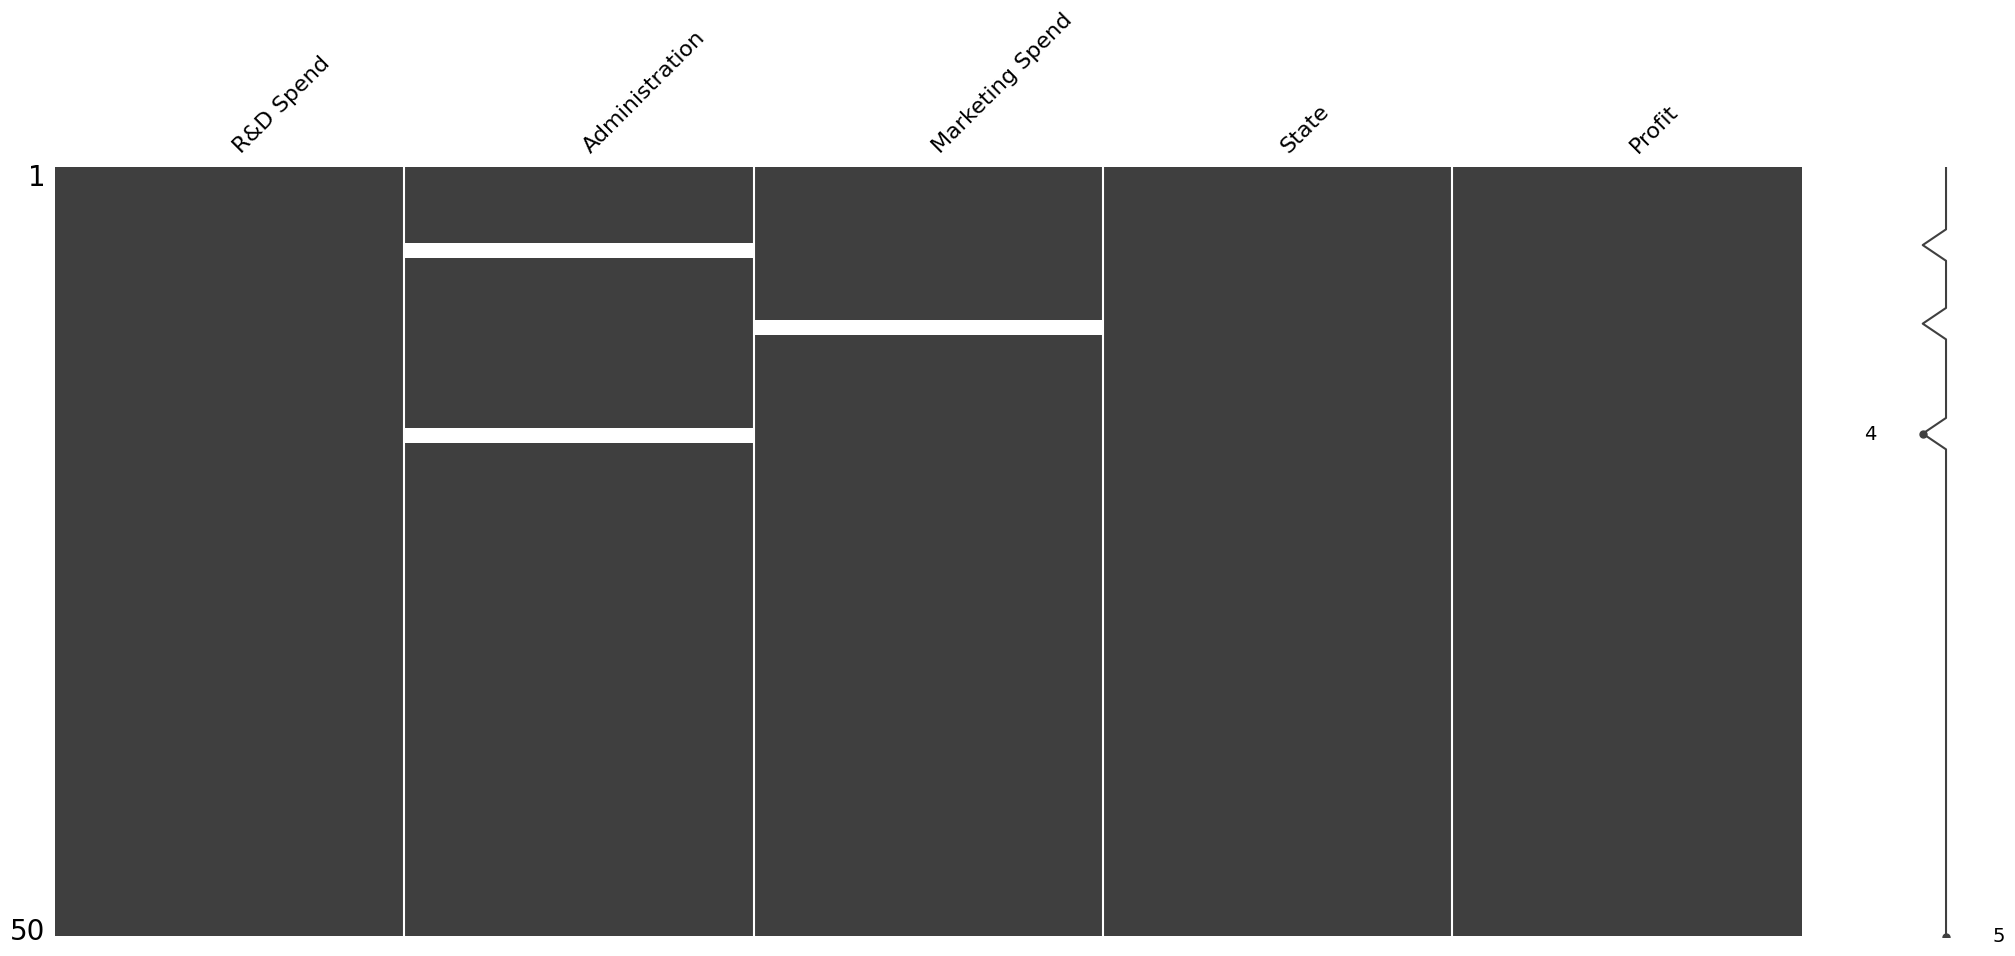

In [3]:
# Convert categorical variable 'State' into a category data type  
df['State'] = df['State'].astype('category')  

# 1. Check and handle missing values  
print("Missing Values in Each Column:\n", df.isnull().sum())  
msno.matrix(df)  

In [4]:
# Fill missing values in the 'Administration' column with its median  
df['Administration'] = df['Administration'].fillna(df['Administration'].median())
df['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].median())

print("Missing Values in Each Column:\n", df.isnull().sum()) 
df.head()  

Missing Values in Each Column:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,166597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [6]:
# 2. Encoding categorical variables  
df_encoded = pd.get_dummies(df, columns=['State'], dtype=int)  
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,166597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
# 3. Change order of columns  
column_order = ['R&D Spend', 'Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York', 'Profit']  
df_encoded = df_encoded[column_order]
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,166597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [8]:
# 4. Rename columns for better readability  
df_encoded.rename(columns={'R&D Spend': 'R&D_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)  
df_encoded.head()

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,166597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


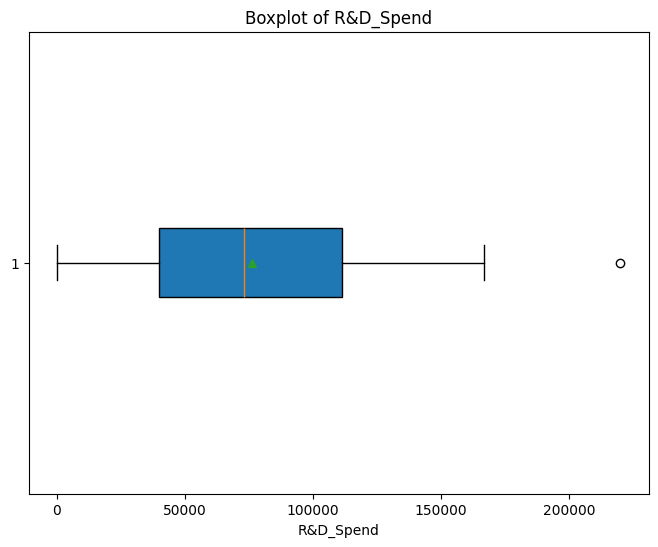

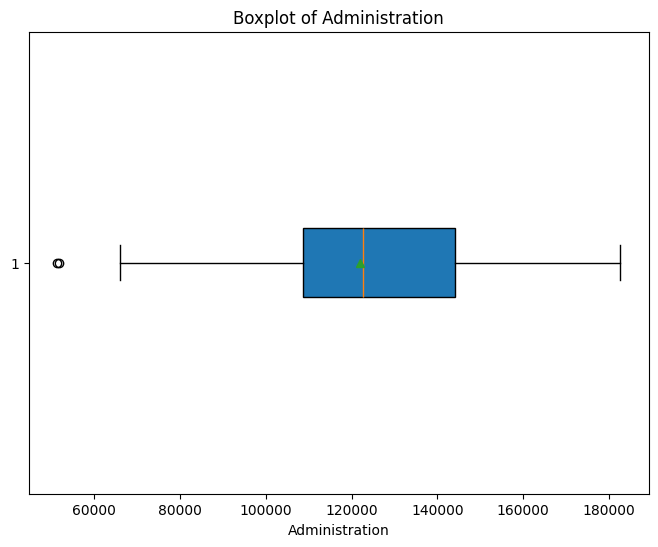

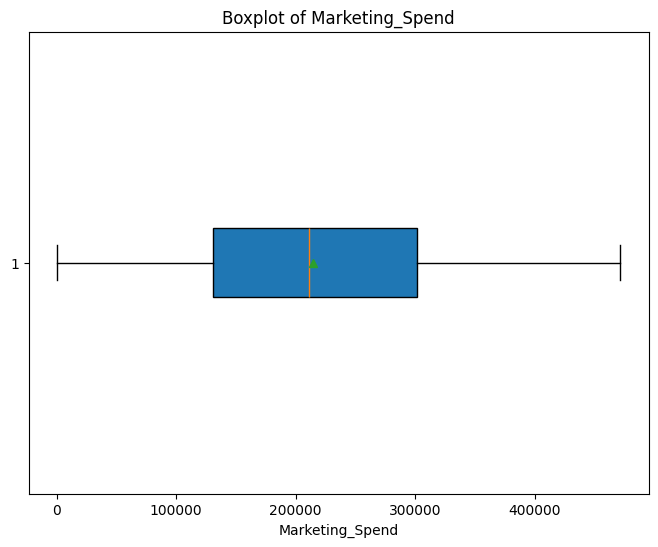

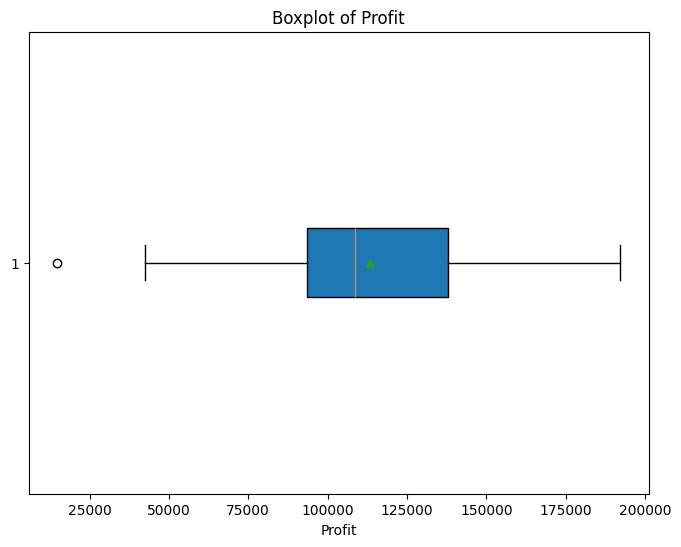

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,166597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


In [9]:
import pandas as pd  
import matplotlib.pyplot as plt  

# 5. Boxplot for outlier detection  
# Function to detect and remove outliers for a single column  
def detect_and_remove_outliers(df, column_name):  
    # Calculate quantiles for outlier detection  
    Q1 = df[column_name].quantile(0.25)  
    Q3 = df[column_name].quantile(0.75)  
    IQR = np.subtract(Q3, Q1)
    
    # lower_bound = Q1 - 1.5 * IQR  
    lower_bound = np.subtract(Q1,  (1.5 * IQR)) 

    # upper_bound = Q3 + 1.5 * IQR  
    upper_bound = np.add(Q3, (1.5 * IQR))  


    # Detect outliers  
    outliers = df[~df[column_name].between(lower_bound, upper_bound)]  

    # Remove outliers from dataframe  
    df_no_outliers = df[df[column_name].between(lower_bound, upper_bound)]  

    # Create boxplot  
    plt.figure(figsize=(8, 6))  
    plt.boxplot(df[column_name], vert=False, patch_artist=True, showmeans=True)  
    plt.xlabel(column_name)  
    plt.title(f'Boxplot of {column_name}')  
    plt.show()  

    return df_no_outliers  

# Apply the function to each column, excluding the binary columns  
for column_name in df_encoded.columns:  
    if df_encoded[column_name].nunique() > 2:  
        df_encoded = detect_and_remove_outliers(df_encoded, column_name)

# Print the final dataframe without outliers  
df_encoded.head()

In [15]:
# Correlation analysis on non-binary columns  
non_binary_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() > 2]  
corr = df_encoded[non_binary_cols].corr().abs().sort_values(by='Profit', ascending=False)
corr

,R&D_Spend,Administration,Marketing_Spend,Profit
Profit,0.979140,0.121229,0.717590,1.000000
R&D_Spend,1.000000,0.183530,0.692837,0.979140
Marketing_Spend,0.692837,0.151462,1.000000,0.717590
Administration,0.183530,1.000000,0.151462,0.121229


In [ ]:
# df.drop(['State_New_York', 'State_Florida', 'State_California'], axis=1, inplace=True)

In [16]:
# Split the dataset into features (X) and target (y)  
X = df_encoded.iloc[:, :-1].values  
y = df_encoded.iloc[:, -1].values  

# Train-test split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)  
print("Train shape:", X_train.shape, y_train.shape)  
print("Test shape:", X_test.shape, y_test.shape)  

Train shape: (36, 6) (36,)
Test shape: (10, 6) (10,)


In [17]:
# Train the Linear Regression model  
model = LinearRegression()  
model.fit(X_train, y_train)  

# Display model intercept and coefficients  
print("Model Intercept:", model.intercept_)  
print("Model Coefficients:", model.coef_)  

Model Intercept: 60413.11362201432
Model Coefficients: [ 7.68736475e-01 -7.20222205e-02  2.15327626e-02  2.13032051e+01
  4.24060022e+02 -4.45363227e+02]


Mean Squared Error: 66502120.46
R² Score: 0.96


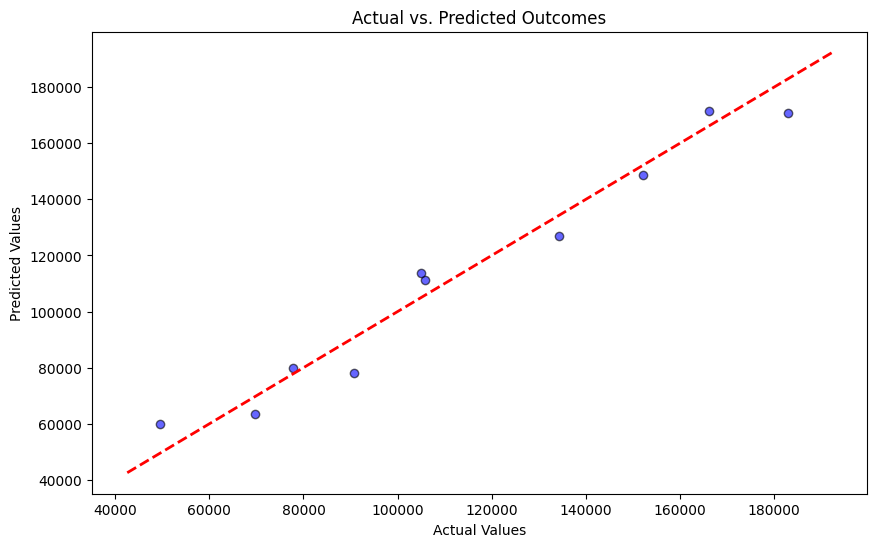

In [18]:
# Predict values for the test set  
y_pred = model.predict(X_test)  

# Evaluate the model using Mean Squared Error (MSE) and R² Score  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Squared Error: {mse:.2f}")  
print(f"R² Score: {r2:.2f}")  

# Optional: Visualize predictions vs actual outcomes  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)  
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.xlabel('Actual Values')  
plt.ylabel('Predicted Values')  
plt.title('Actual vs. Predicted Outcomes')  
plt.show()